In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r'C:\Users\Sodne\Downloads\climate_change_data.csv')

In [4]:
#data Exploartion
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [6]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [7]:
#checking for missing values in the data set
print(df.isnull().sum())

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64


In [8]:
df.dtypes

Date               object
Location           object
Country            object
Temperature       float64
CO2 Emissions     float64
Sea Level Rise    float64
Precipitation     float64
Humidity          float64
Wind Speed        float64
dtype: object

In [27]:
#data Cleaning
#converting date column to datetime and droping the time from the date as it is not needed

df['Date']=pd.to_datetime(df['Date'],format= "%y-%m-%d").dt.date

In [25]:
#checking to see if datetime was actually converted
df.dtypes

Date              datetime64[ns]
Location                  object
Country                   object
Temperature              float64
CO2 Emissions            float64
Sea Level Rise           float64
Precipitation            float64
Humidity                 float64
Wind Speed               float64
dtype: object

In [42]:
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


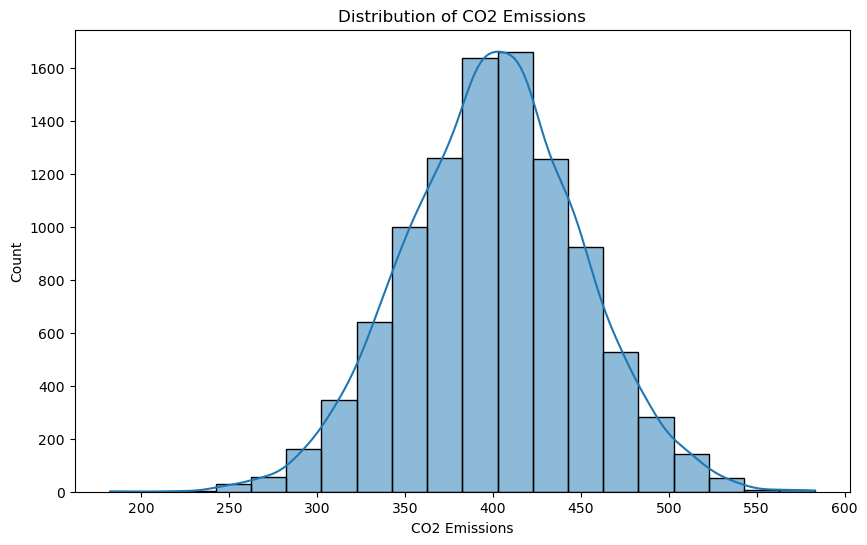

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 Emissions'], bins=20, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.show()

In [57]:
from matplotlib.dates import date2num
df['NumericDate'] = date2num(df['Date'])
coefficients = Polynomial.fit(df['NumericDate'], df['Temperature'], 1).convert().coef
trend = coefficients[-2]
print(f'Temperature Trend: {trend} degrees per year')

Temperature Trend: 15.189284295771678 degrees per year


In [58]:
# Statistical Significance
slope, intercept, r_value, p_value, std_err = linregress(df['NumericDate'], df['Temperature'])
if p_value < 0.05:
    print(f'Temperature trend is statistically significant (p-value: {p_value})')
else:
    print(f'Temperature trend is not statistically significant (p-value: {p_value})')

Temperature trend is not statistically significant (p-value: 0.420562004880085)


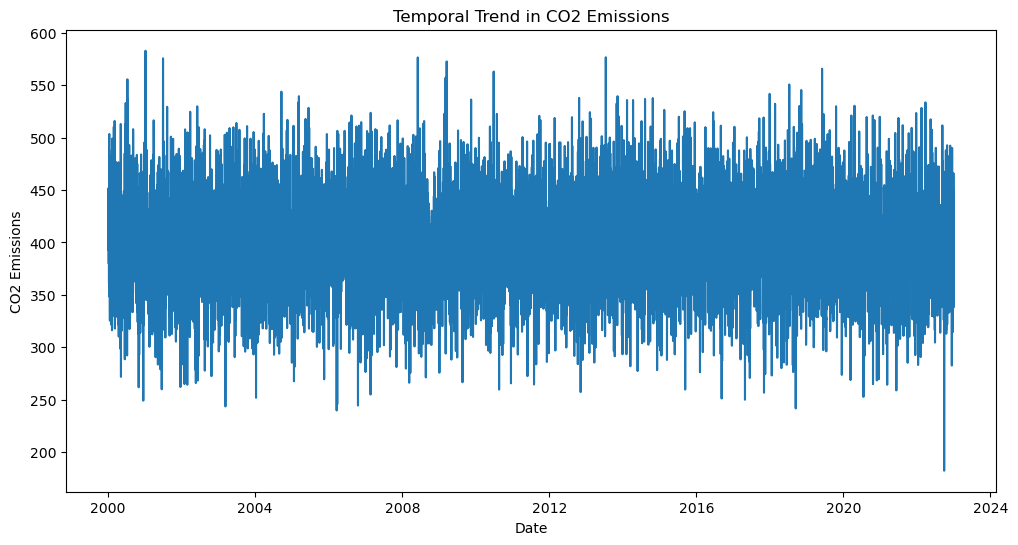

In [51]:
plt.figure(figsize=(12, 6))

# Calculate the average temperature over time
average_temperature = df.groupby('Date')['CO2 Emissions'].mean().reset_index()

# Plot the line
sns.lineplot(x='Date', y='CO2 Emissions', data=average_temperature)

plt.title("Temporal Trend in CO2 Emissions")
plt.show()

In [55]:
from matplotlib.dates import date2num
df['NumericDate'] = date2num(df['Date'])
coefficients = Polynomial.fit(df['NumericDate'], df['CO2 Emissions'], 1).convert().coef
trend = coefficients[-2]
print(f'CO2 Emissions Trend: {trend} units per year')

CO2 Emissions Trend: 402.3868620626199 units per year


In [56]:
# Statistical Significance
slope, intercept, r_value, p_value, std_err = linregress(df['NumericDate'], df['CO2 Emissions'])
if p_value < 0.05:
    print(f'CO2 Emissions trend is statistically significant (p-value: {p_value})')
else:
    print(f'CO2 Emissions trend is not statistically significant (p-value: {p_value})')

CO2 Emissions trend is not statistically significant (p-value: 0.4855207962833542)


In [63]:
# Calculate the correlation between temperature and CO2 emissions
correlation = round(df['Temperature'].corr(df['CO2 Emissions']),4)

print(f'Correlation between Temperature and CO2 Emissions: {correlation}')

Correlation between Temperature and CO2 Emissions: -0.0028


In [34]:
df_canada = df[df['Country'] == 'Canada']
df_usa = df[df['Country'] == 'USA']

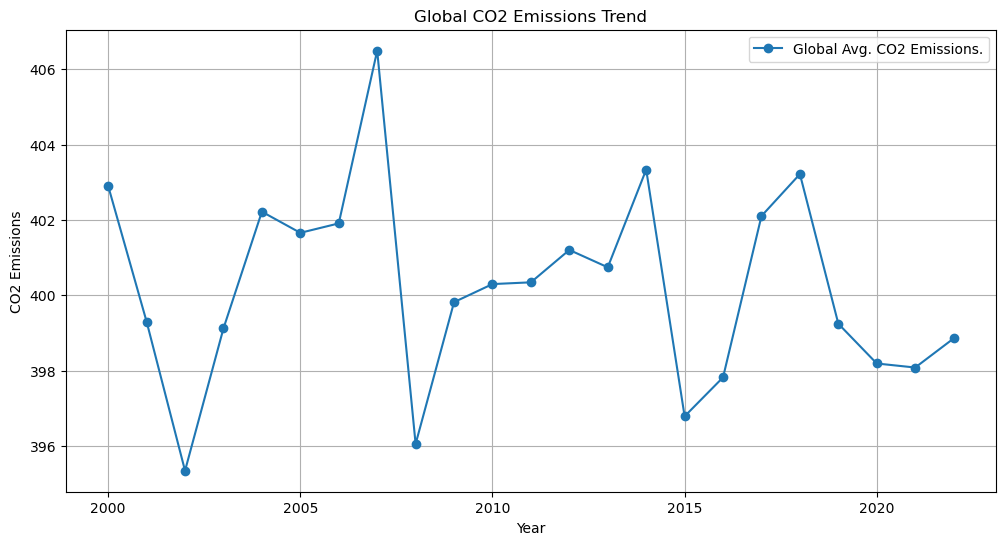

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
# Global average temperature trend
global_avg_emission = df.groupby(df['Date'].dt.year)['CO2 Emissions'].mean()

# Plot global temperature trend
plt.figure(figsize=(12, 6))
plt.plot(global_avg_emission.index, global_avg_emission, marker='o',label='Global Avg. CO2 Emissions.')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Global CO2 Emissions Trend')
plt.grid(True)
plt.legend()
plt.show()

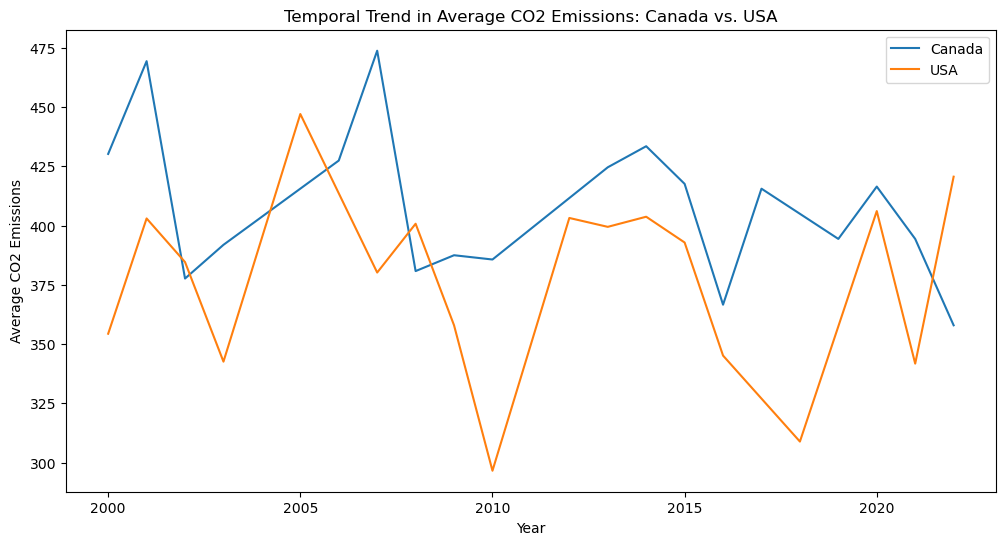

In [46]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))

# Extract the year from the 'Date' column and use it for grouping
df['Year'] = df['Date'].dt.year

# Filter the DataFrame for Canada and USA
df_canada = df[df['Country'] == 'Canada']
df_usa = df[df['Country'] == 'United States of America']

# Group by year and calculate the average CO2 emissions
average_co2_canada = df_canada.groupby('Year')['CO2 Emissions'].mean().reset_index()
average_co2_usa = df_usa.groupby('Year')['CO2 Emissions'].mean().reset_index()

# Plot the lines for both Canada and USA
plt.plot(average_co2_canada['Year'], average_co2_canada['CO2 Emissions'], label='Canada')
plt.plot(average_co2_usa['Year'], average_co2_usa['CO2 Emissions'], label='USA')

plt.title("Temporal Trend in Average CO2 Emissions: Canada vs. USA")
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions')
plt.legend()
plt.show()

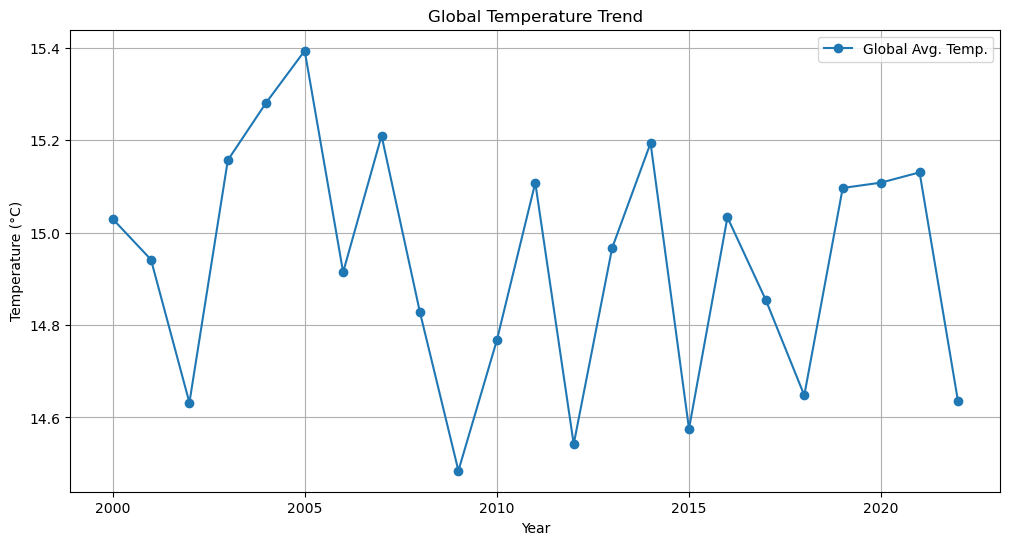

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
# Global average temperature trend
global_avg_temp = df.groupby(df['Date'].dt.year)['Temperature'].mean()

# Plot global temperature trend
plt.figure(figsize=(12, 6))
plt.plot(global_avg_temp.index, global_avg_temp, marker='o', label='Global Avg. Temp.')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Global Temperature Trend')
plt.grid(True)
plt.legend()
plt.show()



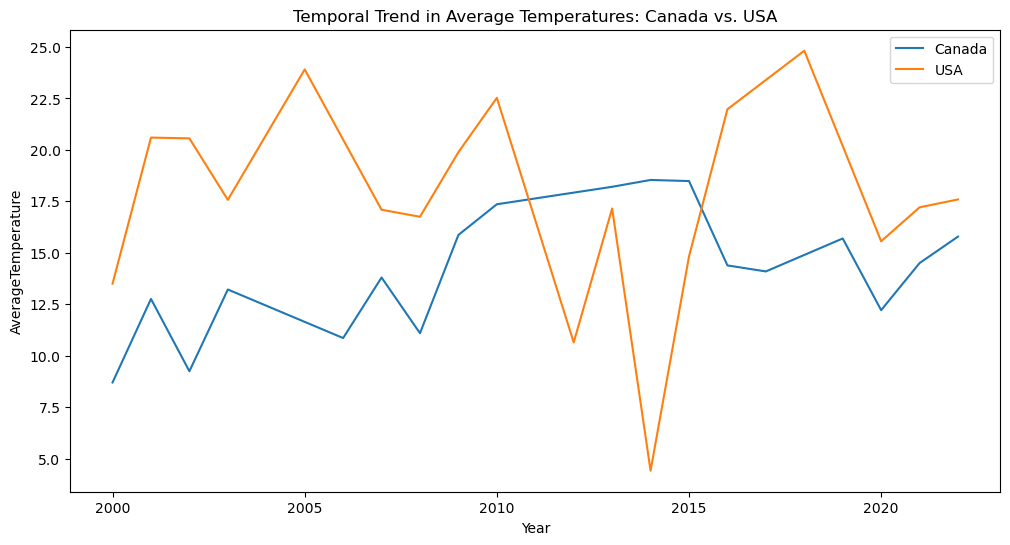

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))

# Extract the year from the 'Date' column and use it for grouping
df['Year'] = df['Date'].dt.year

# Filter the DataFrame for Canada and USA
df_canada = df[df['Country'] == 'Canada']
df_usa = df[df['Country'] == 'United States of America']

# Group by year and calculate the average CO2 emissions
average_temp_canada = df_canada.groupby('Year')['Temperature'].mean().reset_index()
average_temp_usa = df_usa.groupby('Year')['Temperature'].mean().reset_index()

# Plot the lines for both Canada and USA
plt.plot(average_temp_canada['Year'], average_temp_canada['Temperature'], label='Canada')
plt.plot(average_temp_usa['Year'], average_temp_usa['Temperature'], label='USA')

plt.title("Temporal Trend in Average Temperatures: Canada vs. USA")
plt.xlabel('Year')
plt.ylabel('AverageTemperature')
plt.legend()
plt.show()